In [351]:
import graphix as graph
import copy
import numpy as np

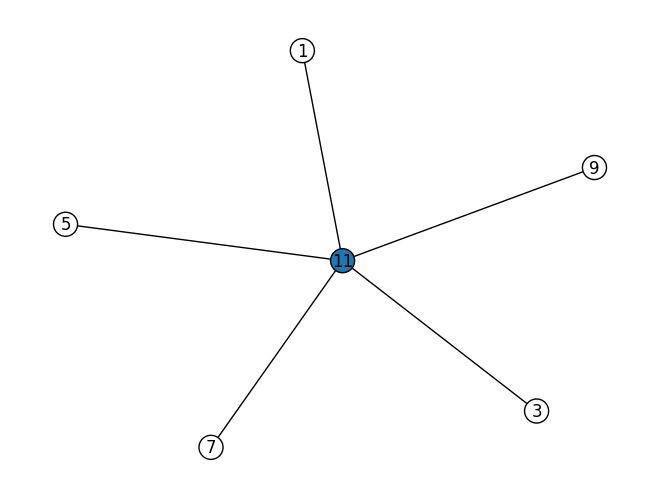

In [425]:
#GHZ
# gs = graph.GraphState(nodes=[1,2,3],edges=[(1,2),(1,3)])
# gs.h(2)
# gs.h(3)
# gs.draw()

#GHZ4
# gs = graph.GraphState(nodes=[1,2,3,4],edges=[(1,2),(1,3),(1,4)])
# gs.h(2)
# gs.h(3)
# gs.h(4)
# gs.draw()

#3-cycle
# gs = graph.GraphState(nodes=[1,2,3],edges=[(1,2),(2,3),(3,1)])
# gs.draw()

#6-cycle
# gs = graph.GraphState(nodes=[1,2,3,4,5,6],edges=[(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])
# gs.measure_x(5)
# gs.draw()

#12-cycle
my_nodes = list(np.arange(1,13))
my_edges = [(i,i+1) for i in np.arange(1,12)] + [(12,1)]
gs = graph.GraphState(nodes=my_nodes,edges=my_edges)
gs.measure_x(2)
gs.measure_x(4)
gs.measure_x(6)
gs.measure_x(8)
gs.measure_x(10)
gs.measure_x(12)
gs.draw()

In [306]:
def reduced_graph(graph_state,measured_nodes):
    #Reduce measured nodes: hollow node are loopless and unconnected to one another
    
    #E1 on every hollow node with loop
    hollow_nodes = [n for n in measured_nodes if graph_state.nodes.get(n)['hollow']]
    hollow_nodes_with_loop = [n for n in hollow_nodes if graph_state.nodes.get(n)['loop']]
    while hollow_nodes_with_loop:
        node = hollow_nodes_with_loop[0]
        graph_state.equivalent_graph_E1(node)
        hollow_nodes.remove(node)
        hollow_nodes_with_loop = [n for n in hollow_nodes if graph_state.nodes.get(n)['loop']]

    hollow_nodes = [n for n in measured_nodes if graph_state.nodes.get(n)['hollow']]
    #E2 on pairs of connected hollow nodes without loop
    for node in hollow_nodes:
        hollow_neighbors = [n for n in list(graph_state.neighbors(node)) if graph_state.nodes.get(n)['hollow']]
        if hollow_neighbors:
            n = hollow_neighbors[0]
            graph_state.equivalent_graph_E2(node,n)
            hollow_nodes.remove(node)
            hollow_nodes.remove(n)
    
    #Disconnect hollow measured node from unmeasured nodes (turn them solid while unmeasured node turn hollow)
    all_nodes = list(graph_state.nodes)
    unmeasured_nodes = [n for n in all_nodes if not n in measured_nodes]
    if not unmeasured_nodes:
        return
    if not hollow_nodes:
        return
    
    for node in hollow_nodes:
        unmeasured_neighbors = [n for n in list(graph_state.neighbors(node)) if n in unmeasured_nodes]
        if unmeasured_neighbors:
            n = unmeasured_neighbors[0]
            if not graph_state.nodes.get(n)['loop']:
                graph_state.equivalent_graph_E2(node,n)
            else:
                graph_state.equivalent_graph_E1(n)
                graph_state.equivalent_graph_E1(node)

[1, 3, 5, 9]
[]
[1, 3, 5, 9]


'random'

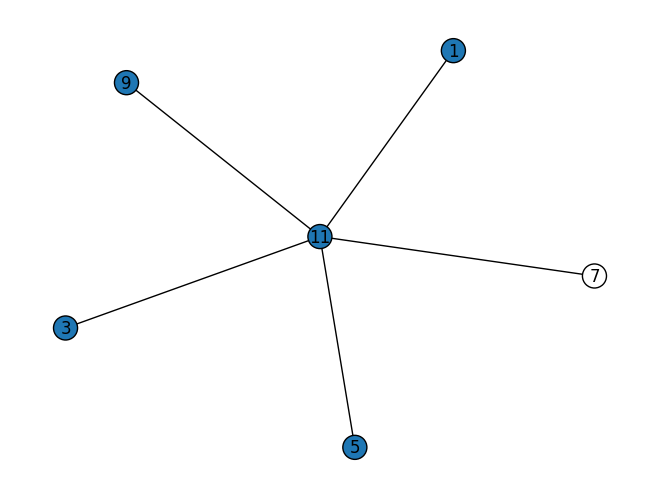

In [421]:
def measure(graph_state,measured_nodes,paulis):

    if len(measured_nodes) != len(paulis):
        raise Exception("Different sizes for measured_nodes and paulis !")
    
    #change all measurement into Z
    for node,pauli in zip(measured_nodes,paulis):
        if pauli == 'Y':
            graph_state.z(node)
            graph_state.s(node)
        if pauli == "X" or pauli=='Y':
            graph_state.h(node)

    reduced_graph(graph_state,measured_nodes)
    graph_state.draw()

    #Estimation of measurement result
    measured_hollow_nodes = [n for n in measured_nodes if graph_state.nodes.get(n)['hollow']]
    measured_solid_nodes = [n for n in measured_nodes if n not in measured_hollow_nodes]
    MSE = []
    for node in measured_solid_nodes:
        measured_hollow_neighbors = [n for n in list(graph_state.neighbors(node)) if n in measured_hollow_nodes]
        if len(measured_hollow_neighbors)%2==0:
            MSE.append(node)

    print(measured_solid_nodes)
    print(measured_hollow_nodes)
    print(MSE)

    if not MSE:
        b = len([n for n in measured_hollow_nodes if graph_state.nodes.get(n)['sign']])  
        return (-1)**b
    return "random"

measure(copy.deepcopy(gs),[1,3,5,9],['X','X','X','X'])

In [372]:
['X' for i in range(12)]

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']